In [1]:
import sys
from os import path
sys.path.append("..")

from svm.svm_custom import SVM
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

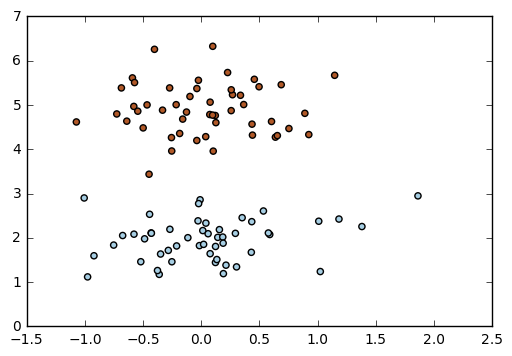

     pcost       dcost       gap    pres   dres
 0: -4.2821e+01 -5.6986e+03  2e+04  7e-01  8e-14
 1:  2.0494e+01 -1.1217e+03  2e+03  5e-02  5e-14
 2:  2.5126e+01 -1.2171e+02  2e+02  4e-03  4e-14
 3:  2.8090e+00 -1.3031e+01  2e+01  2e-15  1e-14
 4: -2.3781e+00 -9.3394e+00  7e+00  3e-16  1e-14
 5: -6.2726e+00 -8.4340e+00  2e+00  4e-16  2e-14
 6: -7.1941e+00 -7.2175e+00  2e-02  6e-16  2e-14
 7: -7.2035e+00 -7.2037e+00  2e-04  2e-15  2e-14
 8: -7.2036e+00 -7.2036e+00  2e-06  2e-15  3e-14
Optimal solution found.


In [2]:
X, y = datasets.make_blobs(centers=[[0, 2], [0, 5]], cluster_std=[0.5, 0.5])
y[y == 0] = -1

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

mysvm = SVM(C=10)
mysvm.fit(X, y)

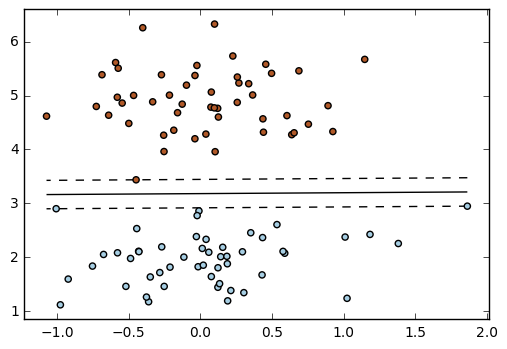

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Determine decision boundry
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
b_test = list(np.c_[XX.ravel(), YY.ravel()])
Z = mysvm.decision_function(b_test)

# Put the result into a color plot
Z = np.asarray(Z)
Z = Z.reshape(XX.shape)
#plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
plt.show()

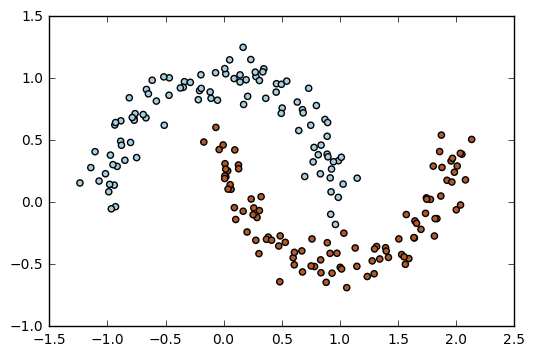

     pcost       dcost       gap    pres   dres
 0:  3.6186e+02 -7.2926e+03  1e+04  3e-01  6e-15
 1:  2.2202e+02 -1.0547e+03  1e+03  1e-02  6e-15
 2: -9.6310e+00 -2.9151e+02  3e+02  2e-03  5e-15
 3: -4.4288e+01 -2.4559e+02  2e+02  1e-03  5e-15
 4: -6.9491e+01 -2.1093e+02  1e+02  2e-04  6e-15
 5: -8.4028e+01 -1.8885e+02  1e+02  1e-04  4e-15
 6: -1.0236e+02 -1.4940e+02  5e+01  3e-05  5e-15
 7: -1.1164e+02 -1.3213e+02  2e+01  1e-05  6e-15
 8: -1.1698e+02 -1.2147e+02  4e+00  7e-07  7e-15
 9: -1.1811e+02 -1.1986e+02  2e+00  2e-07  6e-15
10: -1.1885e+02 -1.1893e+02  8e-02  6e-09  7e-15
11: -1.1888e+02 -1.1888e+02  1e-03  8e-11  7e-15
12: -1.1888e+02 -1.1888e+02  1e-05  8e-13  7e-15
Optimal solution found.


In [4]:
X, y = datasets.make_moons(n_samples=200, noise=0.1)
y[y == 0] = -1

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
plt.show()

mysvm = SVM(C=10, kernel='rbf', gamma=0.5)
#mysvm = SVM(C=1, kernel='poly', degree=3, coef0=0)
mysvm.fit(X, y)

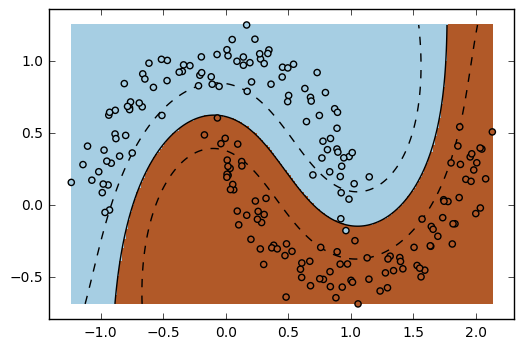

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, zorder=10)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Determine decision boundry
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#XX, YY = np.mgrid[-10:10:200j, -10:10:200j]
b_test = list(np.c_[XX.ravel(), YY.ravel()])
Z = mysvm.decision_function(b_test)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
plt.show()

In [6]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import PolynomialFeatures

def x_to_poly(x, degree=2):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(x)

def x_to_rbf(x, gamma=1.0, n=100):
    rbf_feature = RBFSampler(gamma=gamma, n_components=n, random_state=1)
    return rbf_feature.fit_transform(x)

In [7]:
X_rbf = x_to_rbf(X, gamma=0.5, n=100)

mysvm = SVM(C=10, kernel='linear')
mysvm.fit(X_rbf, y)

mysvm.score(X_rbf, y)

     pcost       dcost       gap    pres   dres
 0:  2.6641e+02 -8.3241e+03  1e+04  3e-01  7e-15
 1:  1.7236e+02 -1.2595e+03  2e+03  1e-02  6e-15
 2: -5.0543e+01 -3.6153e+02  3e+02  2e-03  5e-15
 3: -9.9829e+01 -2.5829e+02  2e+02  6e-04  6e-15
 4: -1.1243e+02 -2.4523e+02  1e+02  4e-04  6e-15
 5: -1.3462e+02 -2.1753e+02  8e+01  2e-04  8e-15
 6: -1.4823e+02 -1.9486e+02  5e+01  8e-05  7e-15
 7: -1.6251e+02 -1.7445e+02  1e+01  1e-05  7e-15
 8: -1.6653e+02 -1.6816e+02  2e+00  1e-06  6e-15
 9: -1.6714e+02 -1.6732e+02  2e-01  7e-08  7e-15
10: -1.6722e+02 -1.6723e+02  2e-03  8e-10  8e-15
11: -1.6722e+02 -1.6722e+02  2e-05  8e-12  8e-15
Optimal solution found.


0.98499999999999999

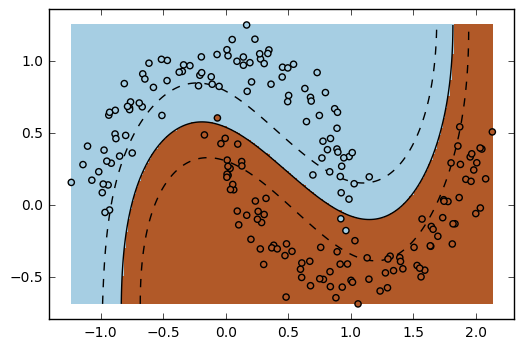

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, zorder=10)

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Determine decision boundry
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
#XX, YY = np.mgrid[-10:10:200j, -10:10:200j]
b_test = list(np.c_[XX.ravel(), YY.ravel()])

b_rbf = x_to_rbf(b_test, gamma=0.5, n=100)

Z = mysvm.decision_function(b_rbf)

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
plt.show()